In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import statistics


In [ ]:
db_new = pd.read_csv('daibetes.csv')
db_new

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [6]:
db.head()
db.tail()
db.dtypes
db.info()
db.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


(100000, 9)

In [6]:
db['age'] = db['age'].astype('int64')
db.dtypes
#db[['gender', 'smoking_history']] = db[['gender','smoking_history'] ].astype('category')
db['gender'].value_counts()
db.age.mean()
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  int64  
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 6.9+ MB


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.875660,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.535417,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


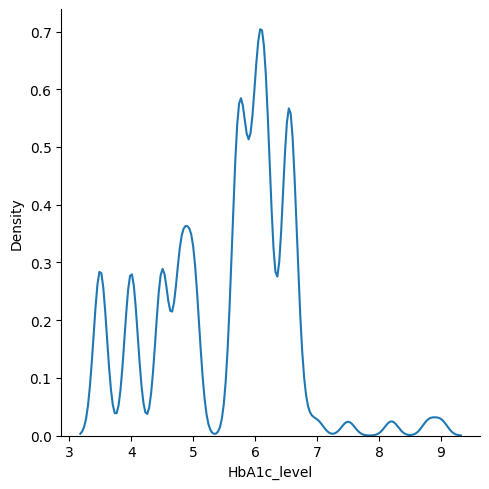

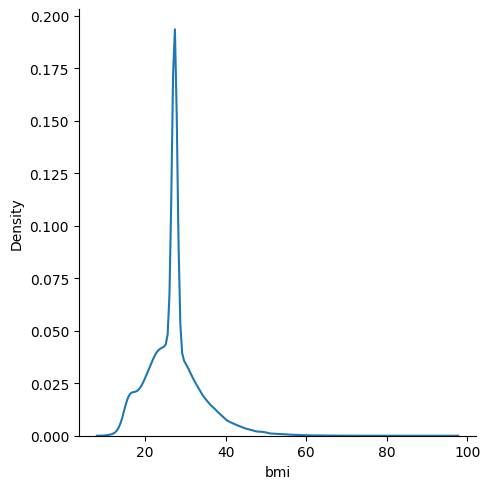

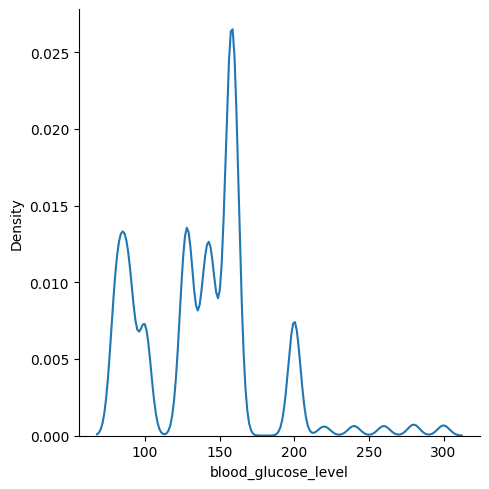

In [7]:
db.nunique()
db['diabetes'].value_counts()
db.duplicated().sum()
db.columns

db.duplicated(subset=['gender'])
#db.drop_duplicates(inplace=True)
db['gender'].value_counts()
sns.displot(data=db,x='HbA1c_level', kind='kde')
sns.displot(data=db, x='bmi', kind='kde')
sns.displot(data=db, x='blood_glucose_level', kind='kde')
db.describe()

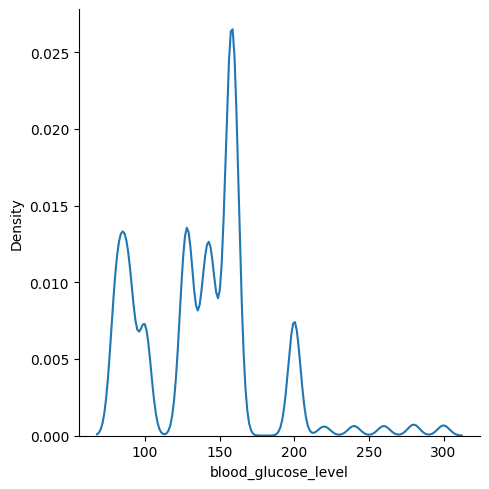

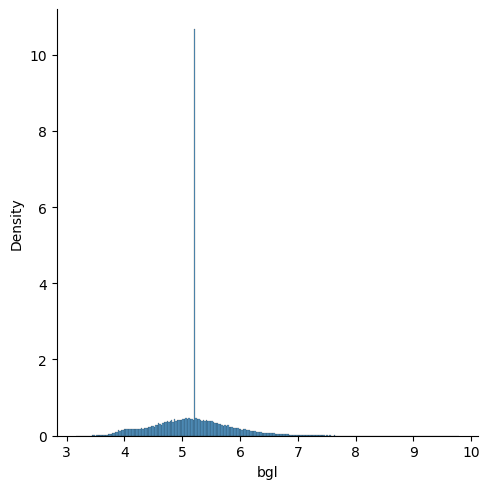

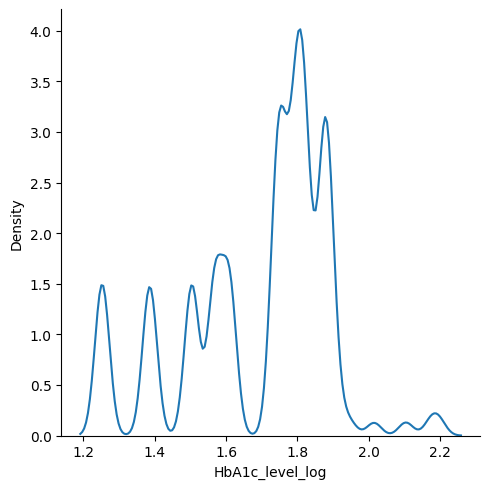

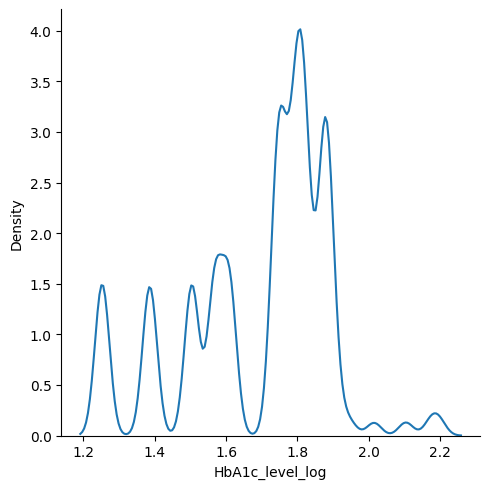

In [110]:
db['heart_disease'].value_counts()
db['heart_disease'].unique()

sns.displot(db['blood_glucose_level'], kind='kde')

db['bgl'] = np.sqrt(db['bmi'])

db['HbA1c_level_log'] = np.log(db['HbA1c_level'])

sns.displot(db['bgl'], stat='density')


sns.displot(db['HbA1c_level_log'], kind='kde')


db['HbA1c_level_crbt'] = np.cbrt(db.HbA1c_level_log)

sns.displot(db.HbA1c_level_log, kind='kde')

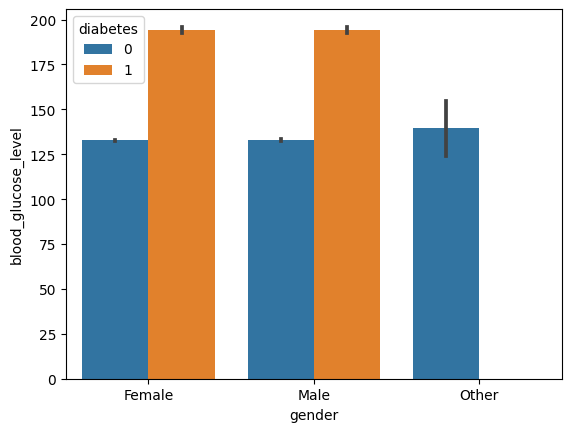

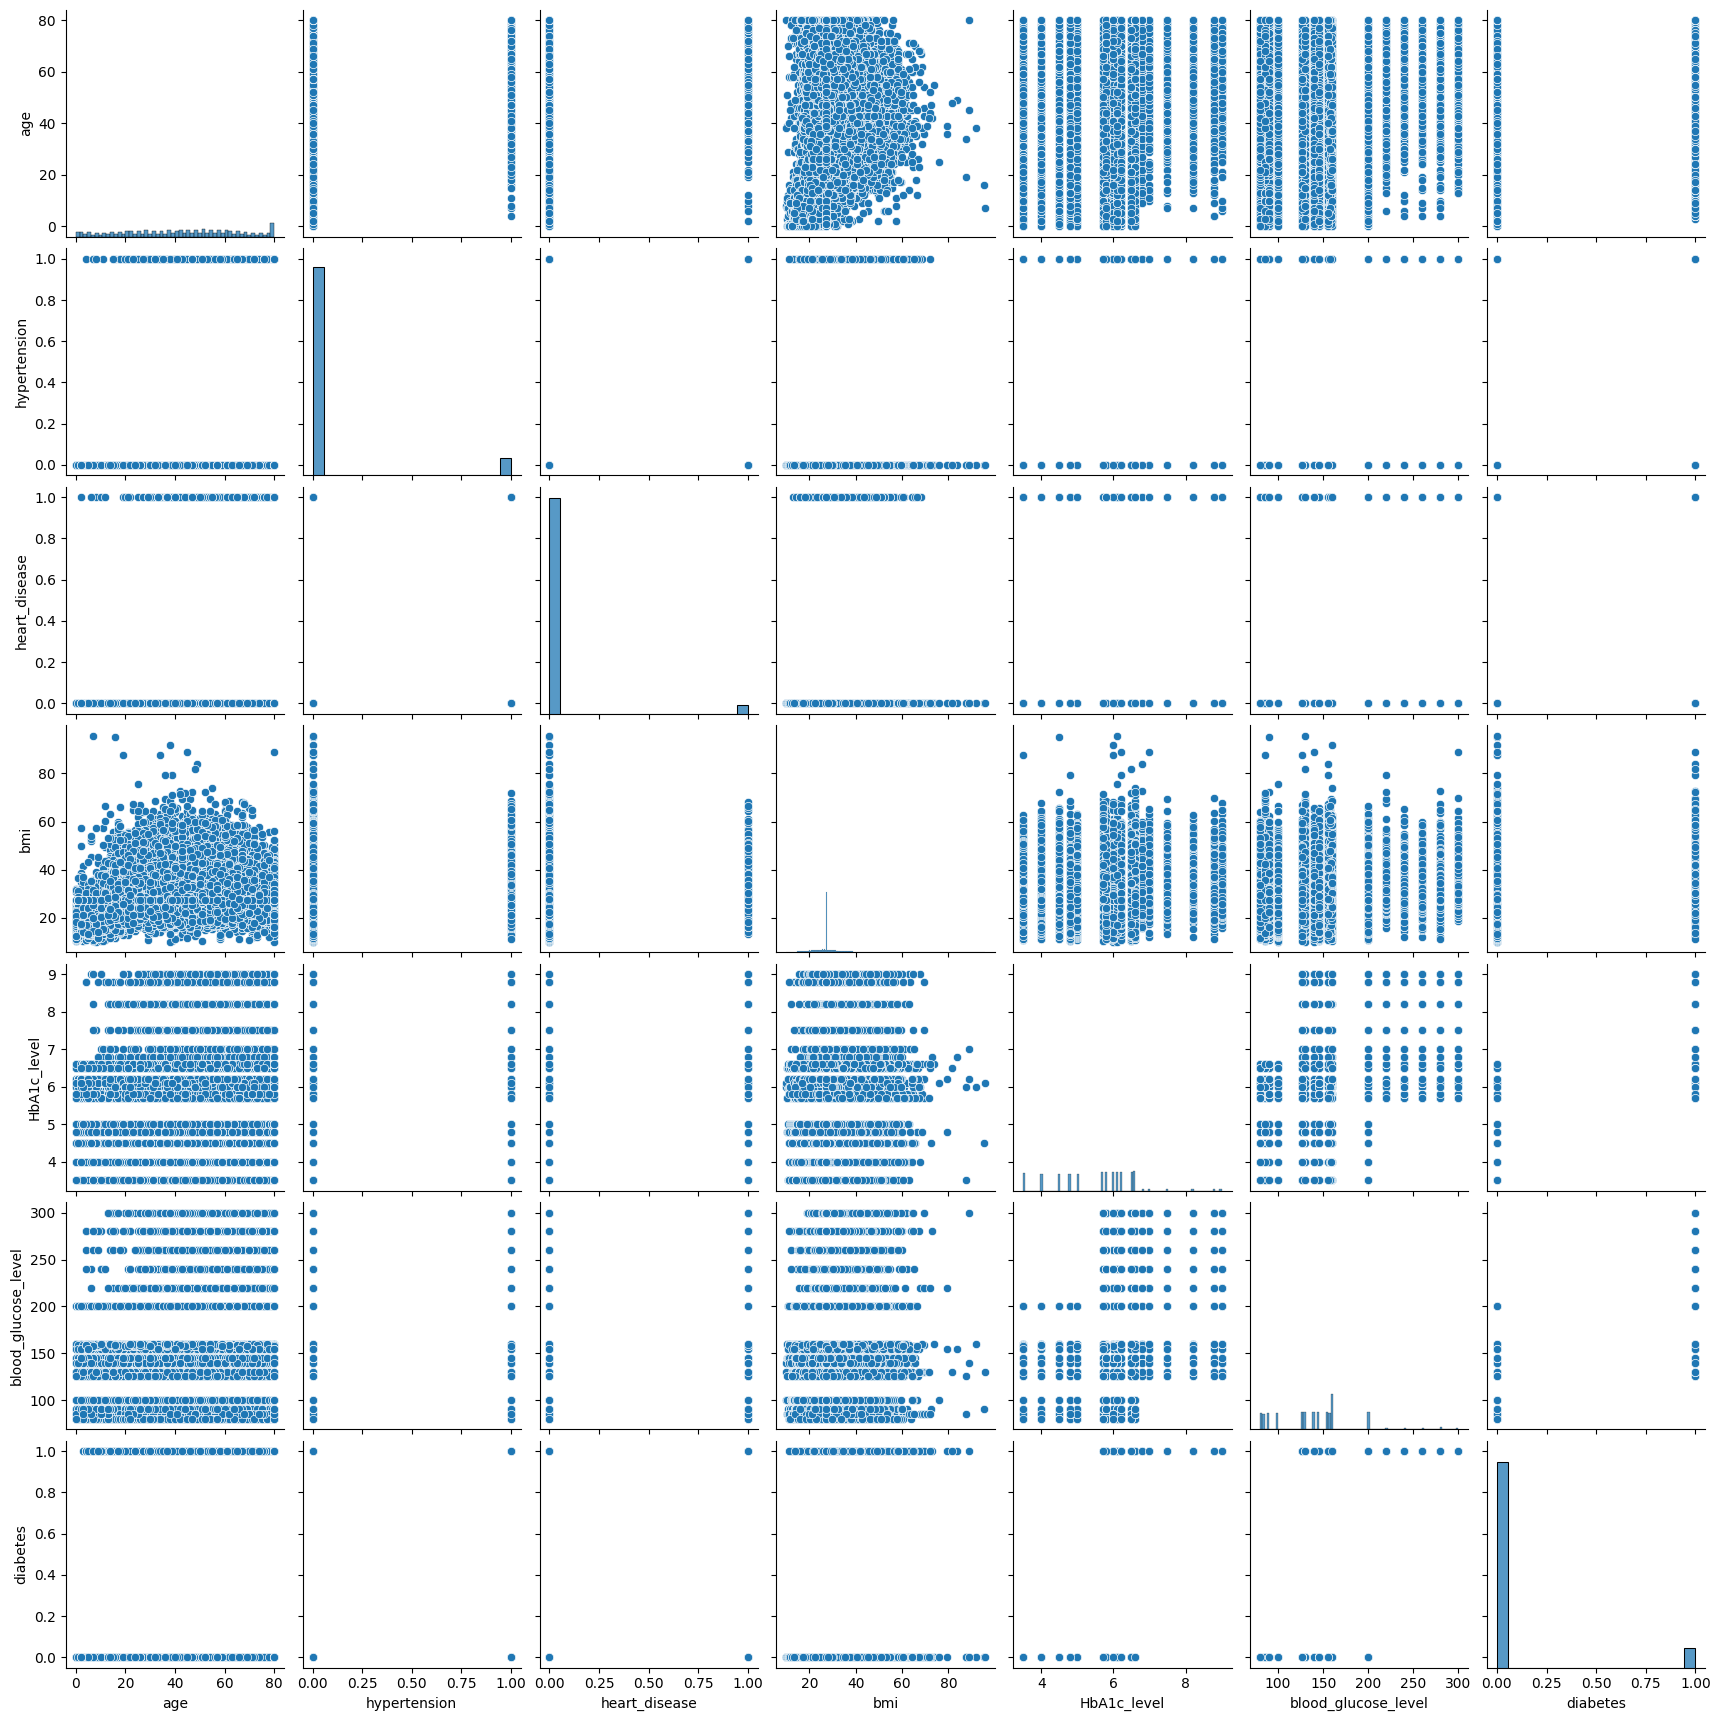

In [24]:
#db['age'].hist()
db['heart_disease'].value_counts()
sns.barplot(data=db, x='gender', y='blood_glucose_level', hue='diabetes')
#sns.barplot(data=db, x='heart_disease', y='bmi', hue='smoking_history')
#db.columns
sns.pairplot(db)

In [8]:
#db.dropna(inplace=True)


missing_val = ['age']

for i in missing_val:
    db.loc[db.loc[:,i].isnull(), i] = db.loc[:,i].mean()
    
db.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

<Axes: xlabel='bmi'>

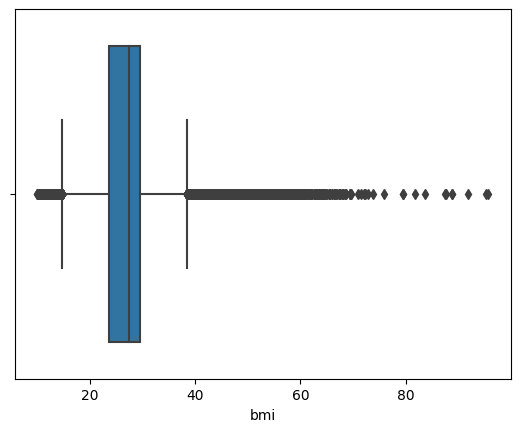

In [44]:
sns.boxplot(data=db, x='bmi')

In [9]:
def find_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    
    outliers = df[((df<(q1-1.5*IQR))| (df>(q3+1.5*IQR)))]
    return outliers


find_outliers(db['bmi'])

In [10]:

outlierss = find_outliers(db['bmi'])

print('Max ouliers is:', outlierss.max())
print('The length of outliers:'   + str(len(outlierss)))


Max ouliers is: 95.69
The length of outliers:7086


In [69]:
upper_limit = db['bmi'].mean() + 3*db['bmi'].std()
upper_limit

lower_limit = db['bmi'].mean()- 3*db['bmi'].std()
lower_limit

upper_limit = db['bmi'].mean() + 3*db['bmi'].std()
upper_limit
lower_limit = db['bmi'].mean()- 3*db['bmi'].std()
lower_limit


def uppper_limit(variable):
    upper = variable.mean() + 3 * variable.std()
    print(upper)
    
def lower_limit(variable):
    lower = variable.mean() - 3 * variable.std()
    print (lower) 


uppper_limit(db['bmi'])
lower_limit(db['bmi'])
      
a = lower_limit(db['hypertension'])

print('... is:{}'.format(a))


47.23111734994511
7.410416850054897


In [11]:
#db.drop(columns=['HbA1c_level_out', 'bmi_out'], inplace=True)


lower_limit = db['HbA1c_level'].mean()- 3*db['HbA1c_level'].std()
upper_limit = db['HbA1c_level'].mean() + 3*db['HbA1c_level'].std()
upper_limit


db['HbA1c_level_Out'] = np.where(db['HbA1c_level'] > upper_limit, upper_limit,
                                 np.where(db['HbA1c_level'] < lower_limit, lower_limit, db['HbA1c_level']))


,gender,age,hypertension,heart_disease,smoking_history,bmi,blood_glucose_level,diabetes,HbA1c_level
0,Female,80.0,0,1,never,25.19,140,0,6.6
1,Female,54.0,0,0,No Info,27.32,80,0,6.6
2,Male,28.0,0,0,never,27.32,158,0,5.7
3,Female,36.0,0,0,current,23.45,155,0,5.0
4,Male,76.0,1,1,current,20.14,155,0,4.8
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,90,0,6.2
99996,Female,2.0,0,0,No Info,17.37,100,0,6.5
99997,Male,66.0,0,0,former,27.83,155,0,5.7
99998,Female,24.0,0,0,never,35.42,100,0,4.0


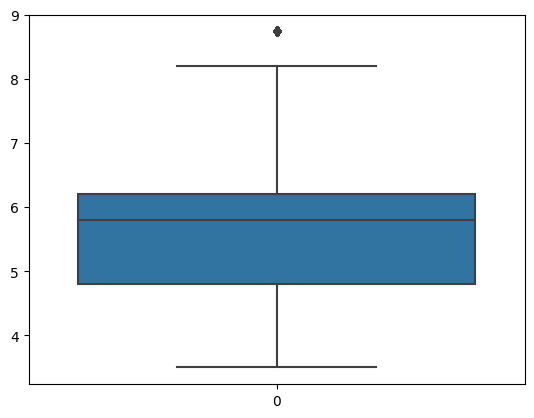

In [34]:
sns.boxplot(db['HbA1c_level_Out'])
#db.drop(columns='HbA1c_level', inplace=True)

db.rename(columns={'HbA1c_level_Out':'HbA1c_level'}, inplace=True)
db

In [35]:
upper_limit = db['bmi'].mean() + 3*db['bmi'].std()
upper_limit
lower_limit = db['bmi'].mean()- 3*db['bmi'].std()
lower_limit


db['bmi_out']= np.where(db['bmi'] > upper_limit, upper_limit, np.where(db['bmi'] < lower_limit, lower_limit, db['bmi']))

In [39]:
#db.drop(columns='bmi', inplace=True)
db

db.rename(columns={'bmi_out': 'bmi'}, inplace=True)

db

,gender,age,hypertension,heart_disease,smoking_history,blood_glucose_level,diabetes,HbA1c_level,bmi
0,Female,80.0,0,1,never,140,0,6.6,25.19
1,Female,54.0,0,0,No Info,80,0,6.6,27.32
2,Male,28.0,0,0,never,158,0,5.7,27.32
3,Female,36.0,0,0,current,155,0,5.0,23.45
4,Male,76.0,1,1,current,155,0,4.8,20.14
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,90,0,6.2,27.32
99996,Female,2.0,0,0,No Info,100,0,6.5,17.37
99997,Male,66.0,0,0,former,155,0,5.7,27.83
99998,Female,24.0,0,0,never,100,0,4.0,35.42


In [41]:
upper_limit = db['blood_glucose_level'].mean() + 3*db['blood_glucose_level'].std()
upper_limit
lower_limit = db['blood_glucose_level'].mean()- 3*db['blood_glucose_level'].std()
lower_limit


db['blood_glucose_level_Out']= np.where(db['blood_glucose_level'] > upper_limit, upper_limit, np.where(db['blood_glucose_level'] < lower_limit, lower_limit, db['blood_glucose_level']))


#db.drop(columns=['blood_glucose_level', 'bmi', 'HbA1c_level'], inplace=True)

In [47]:
#db.drop(columns='blood_glucose_level', inplace=True)
db
db.rename(columns={'blood_glucose_level_Out':'blood_glucose_level'}, inplace=True)
db

,gender,age,hypertension,heart_disease,smoking_history,diabetes,HbA1c_level,bmi,blood_glucose_level
0,Female,80.0,0,1,never,0,6.6,25.19,140.0
1,Female,54.0,0,0,No Info,0,6.6,27.32,80.0
2,Male,28.0,0,0,never,0,5.7,27.32,158.0
3,Female,36.0,0,0,current,0,5.0,23.45,155.0
4,Male,76.0,1,1,current,0,4.8,20.14,155.0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,0,6.2,27.32,90.0
99996,Female,2.0,0,0,No Info,0,6.5,17.37,100.0
99997,Male,66.0,0,0,former,0,5.7,27.83,155.0
99998,Female,24.0,0,0,never,0,4.0,35.42,100.0


<Axes: >

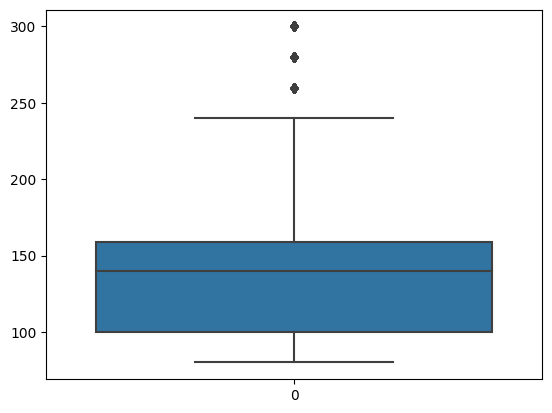

In [101]:
#sns.boxplot(db['bmi'])
sns.boxplot(db['blood_glucose_level'])

In [67]:
class BothLimit:    
    
    def __init__(self, variable):
        self.variable = variable
        self.mean = variable.mean()
        self.std = variable.std()
        
        
    def uppper_limit(self):
        upper = self.mean + 3 * self.std
        return upper
    
    def lower_limit(self):
        lower = self.mean - 3 * self.std
        return lower 


uppper_limit(db['HbA1c_level'])
lower_limit(db['HbA1c_level'])

#db.columns
#dir(a)
#both_limits.__dict__
#a = BothLimits(db['bmi'])
#a.variable
#a.mean
#print('... is :{}'.format(lower_limit(db['bmi']))

8.739523275650631
2.3154907243493685


In [144]:
def imput_mean(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 -q1
    
    upper = df[~(df>(q3+1.5*IQR))].max()
    lower = df[~(df<(q1-1.5*IQR))].min()
    
    df1 = np.where(df > upper, df.mean(),
                   np.where(df < lower, df.mean(), 
                            df))
    return df1
    
    
    

In [9]:
#db['blood_glucose_level_Out'] = imput_mean(db['blood_glucose_level'])

db['blood_glucose_level'].describe()

count    100000.000000
mean        138.058060
std          40.708136
min          80.000000
25%         100.000000
50%         140.000000
75%         159.000000
max         300.000000
Name: blood_glucose_level, dtype: float64

In [63]:
#sns.boxplot(db['blood_glucose_level_Out'])
#db.drop(columns=['blood_glucose_level', 'HbA1c_level', 'bmi'], inplace=True)

#db.to_csv('db_new.csv', index=False)

ab = pd.read_csv('db_new.csv')
ab

,gender,age,hypertension,heart_disease,smoking_history,diabetes,HbA1c_level,bmi,blood_glucose_level
0,Female,80.0,0,1,never,0,6.6,25.19,140.0
1,Female,54.0,0,0,No Info,0,6.6,27.32,80.0
2,Male,28.0,0,0,never,0,5.7,27.32,158.0
3,Female,36.0,0,0,current,0,5.0,23.45,155.0
4,Male,76.0,1,1,current,0,4.8,20.14,155.0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,0,6.2,27.32,90.0
99996,Female,2.0,0,0,No Info,0,6.5,17.37,100.0
99997,Male,66.0,0,0,former,0,5.7,27.83,155.0
99998,Female,24.0,0,0,never,0,4.0,35.42,100.0


<Axes: xlabel='diabetes', ylabel='HbA1c_level'>

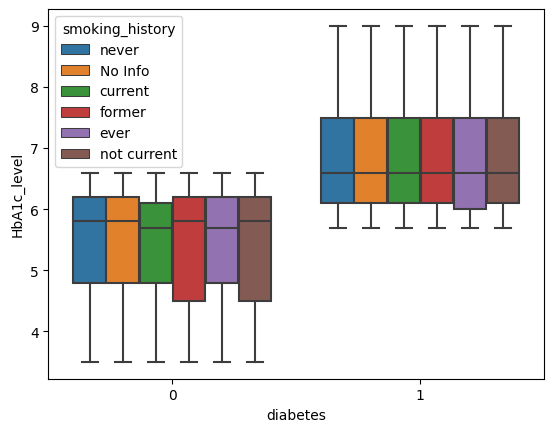

In [41]:

sns.boxplot(x='gender', y='bmi', data=db, hue='hypertension')
db.columns
sns.catplot(data=db, x='smoking_history',y='bmi' , hue='diabetes')
db.columns
#sns.boxplot(data=db, x='diabetes', y='blood_glucose_level')
sns.boxplot(data=db, x='diabetes', y='HbA1c_level', hue='smoking_history')
#sns.boxplot(data=db, x='diabetes', y='age', hue='gender')
#sns.boxplot(data=db, x='diabetes', y='bmi1', hue='heart_disease')



[Text(0.5, 1.0, 'Impact on Diabetes')]

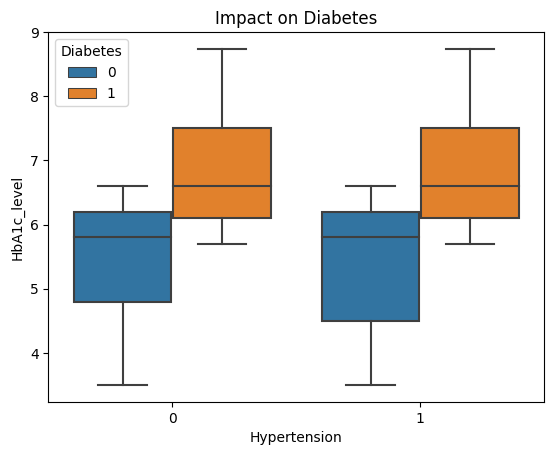

In [75]:


ab.rename(columns={'hypertension':'Hypertension', 'diabetes':'Diabetes'}, inplace=True)

sns.boxplot(data=ab, x='Hypertension', y='HbA1c_level', hue='Diabetes').set(title='Impact on Diabetes')


In [66]:
db.columns

db_group = db[['hypertension','diabetes','blood_glucose_level','heart_disease','bmi']]

db_group.groupby(['diabetes']).mean()

#db_group.groupby(['diabetes']).median()


db.pivot_table(index=['diabetes', 'gender'], columns='smoking_history', values='bmi', aggfunc='mean')
#db.columns

smoking_history    No Info    current       ever     former      never  \
diabetes gender                                                          
0        Female  25.420730  28.008294  28.403947  28.885202  27.631442   
         Male    24.725530  28.164023  28.268903  29.275867  27.690294   
         Other   26.805000        NaN  27.320000        NaN  33.613333   
1        Female  31.260411  32.012572  32.276682  33.397935  33.001274   
         Male    30.471786  31.140221  31.544674  31.572976  31.498705   

smoking_history  not current  
diabetes gender               
0        Female    27.765987  
         Male      27.655309  
         Other     25.480000  
1        Female    32.926396  
         Male      31.356453

In [32]:
x = ab.loc[:, ['hypertension', 'HbA1c_level', 'blood_glucose_level', ' bmi', 'age']]
ab.columns

minmax = MinMaxScaler()

transmin = minmax.fit_transform(x)

Xt = pd.DataFrame(transmin, columns=x.columns)

#Xt.to_csv('Scaled_X_new.csv', index=False)

In [13]:
db_new = pd.read_csv('db_new.csv')


db1 = pd.get_dummies(db, columns=['gender', 'smoking_history'], dtype='int64', drop_first=True)

db1.head()
db1.dtypes

db1['diabetes'].value_counts()

y = db1['diabetes']

dp_x= db1.drop(columns=['diabetes'])

dp_x.columns

scale = StandardScaler()

minmax_scale = MinMaxScaler()

scaled_x = scale.fit_transform(dp_x)

min_scale = minmax_scale.fit_transform(dp_x)
scaledx1 = pd.DataFrame(scaled_x, columns=dp_x.columns)

min_fin_scaled = pd.DataFrame(min_scale, columns=dp_x.columns)

min_fin_scaled
#MinfinScaled.to_csv('X_scled.csv', index=False)
x = min_fin_scaled.loc[:, ['hypertension', 'HbA1c_level', 'blood_glucose_level', 'bmi', 'age']]




In [ ]:
import pickle
m = pickle.load(open('Dai_RfM.pkl','rb'))

a = 0
b = 6.2
c = 158
d = 22
e = 26

aa = (a - db_new['hypertension'].min())/(db_new['hypertension'].max() - db_new['hypertension'].min())

bb = (b - db_new['HbA1c_level'].min())/(db_new['HbA1c_level'].max() - db_new['HbA1c_level'].min())

cc = (c - db_new['blood_glucose_level'].min())/(db_new['blood_glucose_level'].max() - db_new['blood_glucose_level'].min())

dd = (d - db_new[' bmi'].min())/(db_new[' bmi'].max() - db_new[' bmi'].min())

ee = (e - db_new['age'].min())/(db_new['age'].max() - db_new['age'].min())


print(aa, bb, cc, dd, ee)



In [ ]:

a = np.array([[0, 140, 80, 25.19, 0]])
a

#X = X.loc[:, ['HbA1c_level', 'blood_glucose_level','age',
#'bmi','hypertension']]

#80.0	0	1	never	0	6.6	25.19	140.0
	

norm = np.linalg.norm(a)       # To find the norm of the array                             # Printing the value of the norm
normalized_array = a/norm  # Formula used to perform array normalization
print(normalized_array)

m.predict(normalized_array)

In [37]:
lb = LabelEncoder()

db['gender'] = lb.fit_transform(db['gender'])
db['smoking_history'] = lb.fit_transform(db['smoking_history'])

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


In [10]:
import json

with open('dummped.json', 'r') as f:
    data = json.load(f)
    

       
       
for n in data:
    for k, u in n['fields'].items():
        print(k, u)
